# Exploratory Data Analysis On Haberman's Dataset

## Domain Knowledge:-
### 1) The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
### 2) Attribute Information:
####              a)Age of patient at time of operation (numerical)
####              b)Patient's year of operation (year - 1900, numerical)
####              c)Number of positive axillary nodes detected (numerical)
####              d)Survival status (class attribute)
####                         1 = the patient survived 5 years or longer
####                         2 = the patient died within 5 year


## Objective:-
### Classify if a patient will survive more or less than 5 years after being undergone a surgery for breast cancer.

In [77]:
#import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

In [7]:
#import the dataset using pandas

patient = pd.read_csv('haberman.csv')

In [10]:
#check the data
# 1) check collumn headers
print("column hearder:\n",patient.columns)
# 2) shape of the data(rows x columns)
print("Shape:\n",patient.shape)

column hearder:
 Index(['age', 'year', 'nodes', 'status'], dtype='object')
Shape:
 (306, 4)


In [17]:
# Check if the data is balanced
a = list(patient['status'].value_counts())
print(a)
print("ratio = ",a[1]/a[0])

[225, 81]
ratio =  0.36


# Observation:
## 1) The data seems to be imbalanced since one class has 36% more records than the other.

## Note:
### Since the number of dimesion is 3(excluding the class label) we can easily perform univaraite and Bi-variate Analysis
### 1) Univariate Analysis: Plotting histograms,PDF,CDF for each feature

In [44]:
#store the feature name in a list,expect class label column
data = patient.columns[:-1]

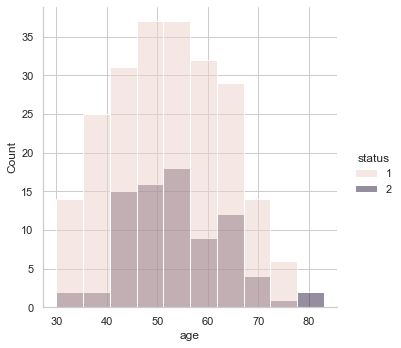

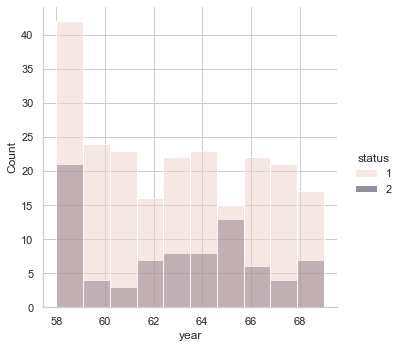

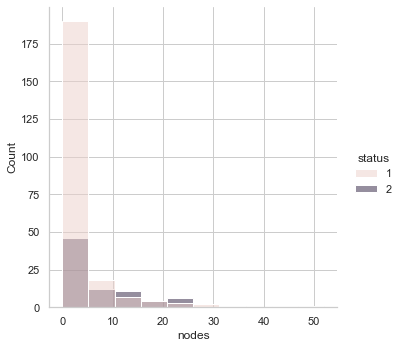

In [58]:
#plot histograms and pdf using seaborn
sns.set_theme(style = 'whitegrid')
for fea in data:
    sns.displot(data = patient, x = fea, hue = 'status',bins = 10)
    plt.plot()

# Observations:
## 1) Patient of 80 years of age seem to live less than 5 years after operation
## 2) Patients with less the 5 nodes seem to live more than 5 years after operation

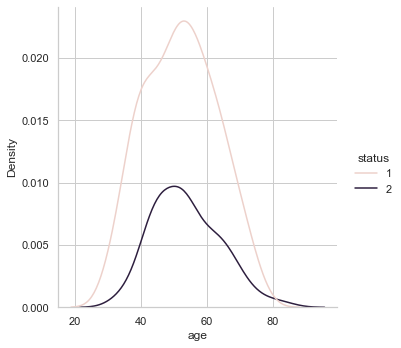

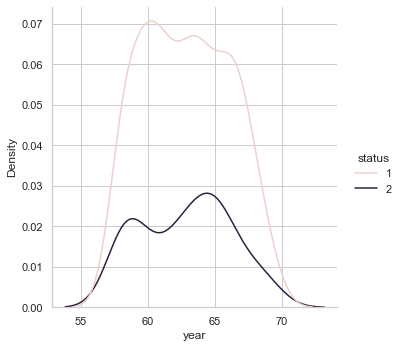

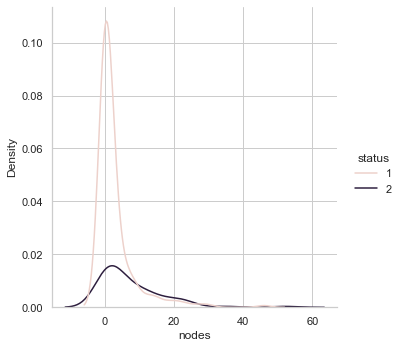

In [59]:
for fea in data:
    sns.displot(data = patient, x = fea, hue = 'status',kind = 'kde')
    plt.plot()

# Observations:-
## 1) It looks like the two classes in age have gaussian distribution

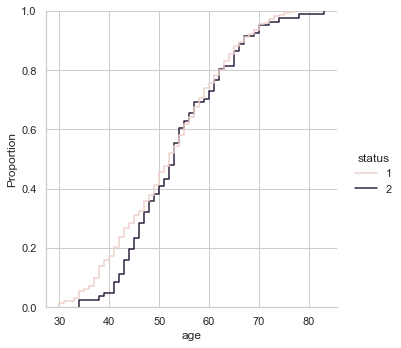

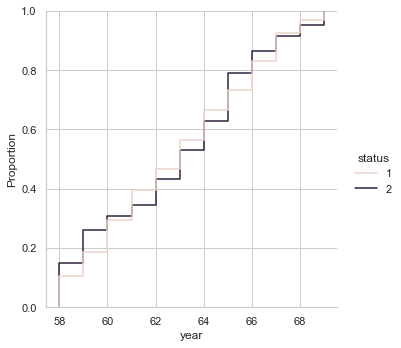

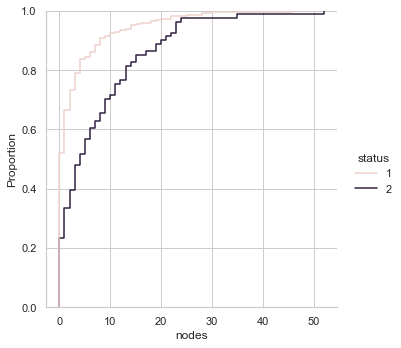

In [60]:
for fea in data:
    sns.displot(data = patient, x = fea, hue = 'status',kind = 'ecdf')
    plt.plot()

  # Observations:
  ## 1) For year and age we can not make any conclusions as the cdf for both classes almost overlap
  ## 2) For nodes we see that both the classes rise with a steady gap of 0.3 approx. for nodes less than 15 and then they start to converge and hence we cannot make any conclusions about the dependence of class on either nodes

# Bi-variate Analysis

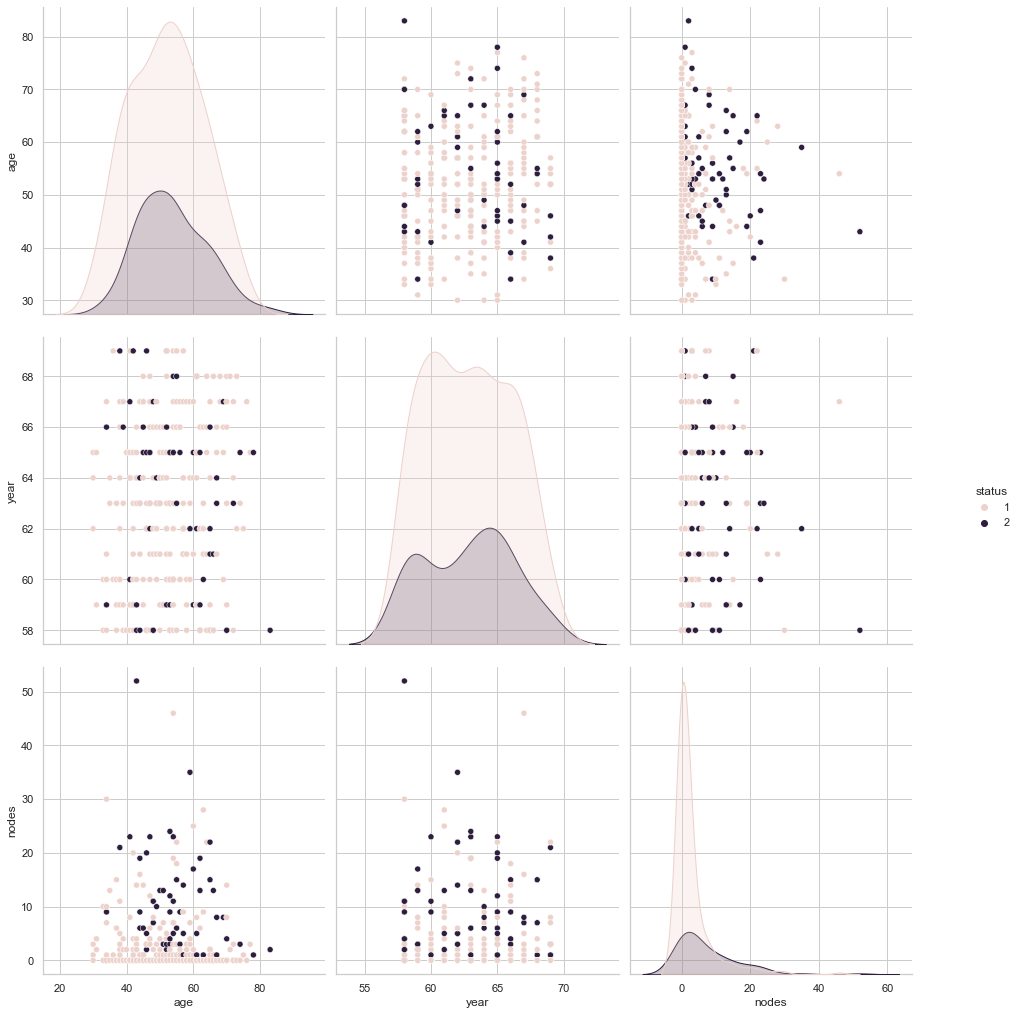

In [74]:
#for this we will use pair-plot as the feature size is low and we can see the scatter plots of all the pairs
pp = sns.pairplot(data = patient, hue = 'status')
pp.fig.set_size_inches(15,15)

# Observations:
## 1) We cannot make any conclusions using age-year and year-nodes scatter plot.
## 2) From age-nodes scatter plot, if age = 40 and nodes < 20 then we observe that almost all except one person died after 5 years.  

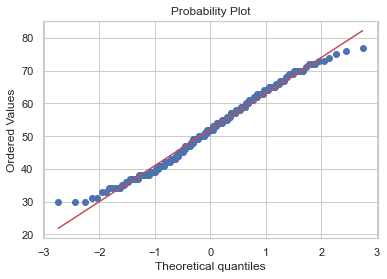

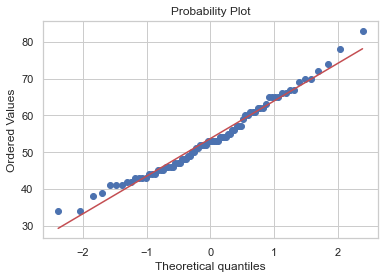

In [80]:
#checking if classes in age follow gaussian distribution

class1 = patient[patient['status'] == 1]
class2 = patient[patient['status'] == 2]
stats.probplot(class1['age'], dist="norm", plot=pylab)
pylab.show()
stats.probplot(class2['age'], dist="norm", plot=pylab)
pylab.show()

# Observation
## 1) We can assume that class 1 for age follows a gaussian distribution as almost all points lie in the same line(the low number of points that are deviated can be the result of less data points)
## 2) We cannot say that the class 2 in age  follows a gaussian distribution as as the points are scattered from the straight line

# Conclusion
## 1)Patient of 80 years of age seem to live less than 5 years after operation
## 2) If age = 40 and nodes < 20 then patient is very likely to live more than 5 years
## 3) Age column follows a gaussian dist. where status = 1.